In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
torch.cuda.set_device(0)

In [5]:
PATH = "data/distractedDriver/"
sz = 224  #check the size
arch = resnet34
bs = 58

In [7]:
#??get_cv_idxs

In [199]:
# read the file and assign indeces for validation set
label_csv = f'{PATH}driver_imgs_list-NT_reordered.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [200]:
list(open(label_csv))

['img,classname,subject,,\n',
 'img_44733.jpg,c0,p002,,\n',
 'img_72999.jpg,c0,p002,,\n',
 'img_25094.jpg,c0,p002,,\n',
 'img_69092.jpg,c0,p002,,\n',
 'img_92629.jpg,c0,p002,,\n',
 'img_3370.jpg,c0,p002,,\n',
 'img_67639.jpg,c0,p002,,\n',
 'img_58560.jpg,c0,p002,,\n',
 'img_35779.jpg,c0,p002,,\n',
 'img_10012.jpg,c0,p002,,\n',
 'img_70354.jpg,c0,p002,,\n',
 'img_54617.jpg,c0,p002,,\n',
 'img_26684.jpg,c0,p002,,\n',
 'img_82409.jpg,c0,p002,,\n',
 'img_5585.jpg,c0,p002,,\n',
 'img_19029.jpg,c0,p002,,\n',
 'img_40930.jpg,c0,p002,,\n',
 'img_31547.jpg,c0,p002,,\n',
 'img_87373.jpg,c0,p002,,\n',
 'img_10627.jpg,c0,p002,,\n',
 'img_66355.jpg,c0,p002,,\n',
 'img_97714.jpg,c0,p002,,\n',
 'img_37344.jpg,c0,p002,,\n',
 'img_54848.jpg,c0,p002,,\n',
 'img_59964.jpg,c0,p002,,\n',
 'img_70675.jpg,c0,p002,,\n',
 'img_43317.jpg,c0,p002,,\n',
 'img_13585.jpg,c0,p002,,\n',
 'img_63064.jpg,c0,p002,,\n',
 'img_91058.jpg,c0,p002,,\n',
 'img_79799.jpg,c0,p002,,\n',
 'img_18198.jpg,c0,p002,,\n',
 'img_55108.

In [201]:
n

22424

In [202]:
len(val_indx)

4484

In [203]:
label_df = pd.read_csv(label_csv)

In [204]:
label_df.head()

,img,classname,subject,Unnamed: 3,Unnamed: 4
0,img_44733.jpg,c0,p002,NaN,NaN
1,img_72999.jpg,c0,p002,NaN,NaN
2,img_25094.jpg,c0,p002,NaN,NaN
3,img_69092.jpg,c0,p002,NaN,NaN
4,img_92629.jpg,c0,p002,NaN,NaN


In [23]:
#remove the first column as we don't need it for submission
label_df.drop(['subject'], axis=1)

,classname,img
0,c0,img_44733.jpg
1,c0,img_72999.jpg
2,c0,img_25094.jpg
3,c0,img_69092.jpg
4,c0,img_92629.jpg
5,c0,img_3370.jpg
6,c0,img_67639.jpg
7,c0,img_58560.jpg
8,c0,img_35779.jpg
9,c0,img_10012.jpg


In [68]:
# #swap the columns
# columnsTitles=["img","classname"]
# label_df=label_df.reindex(columns=columnsTitles)

In [69]:
label_df.head()

,img,classname
0,img_44733.jpg,c0
1,img_72999.jpg,c0
2,img_25094.jpg,c0
3,img_69092.jpg,c0
4,img_92629.jpg,c0


In [78]:
# look at how many images there are for each class
label_df.pivot_table(index="classname", aggfunc=len).sort_values('img', ascending=False)

,img
classname,
c0,2489
c3,2346
c4,2326
c6,2325
c2,2317
c5,2312
c1,2267
c9,2129
c7,2002


In [127]:
# won't apply data augmentation to flip images since it categorizes right and left movements (c?)
tfms = tfms_from_model(arch, sz, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}driver_imgs_list-NT_reordered.csv', test_name='test',
                                   val_idxs=val_idxs, tfms=tfms, bs=bs)

In [129]:
fn = PATH + data.trn_ds.fnames[0] ; fn

'data/distractedDriver/train/img_44733.jpg'

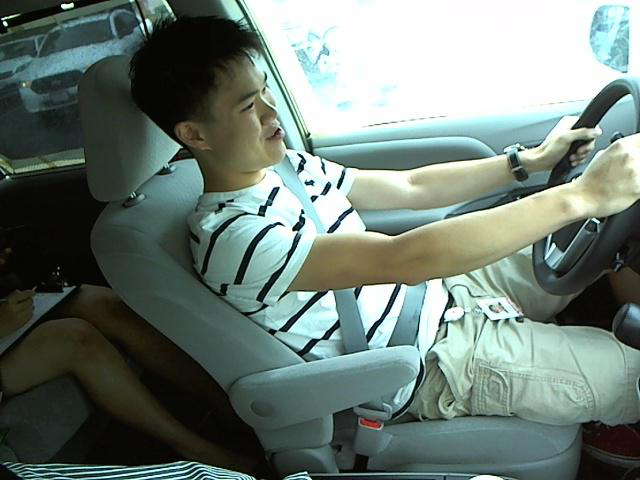

In [131]:
img = PIL.Image.open(fn); img
# img = PIL.Image.open(f'{PATH}train/img_6265.jpg'); img

In [132]:
img.size

(640, 480)

In [137]:
size_d = {k: PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

In [138]:
row_sz, col_sz = list(zip(*size_d.values()))

In [141]:
?*size_d

In [142]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [143]:
row_sz[:5]

array([640, 640, 640, 640, 640])

(array([    0.,     0.,     0.,     0.,     0., 17940.,     0.,     0.,     0.,     0.]),
 array([639.5, 639.6, 639.7, 639.8, 639.9, 640. , 640.1, 640.2, 640.3, 640.4, 640.5]),
 <a list of 10 Patch objects>)

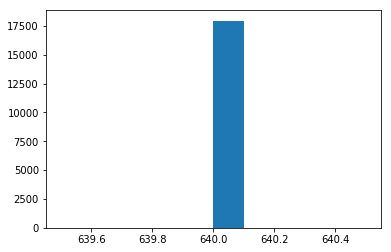

In [144]:
plt.hist(row_sz)

(array([    0.,     0.,     0.,     0.,     0., 17940.,     0.,     0.,     0.,     0.]),
 array([479.5, 479.6, 479.7, 479.8, 479.9, 480. , 480.1, 480.2, 480.3, 480.4, 480.5]),
 <a list of 10 Patch objects>)

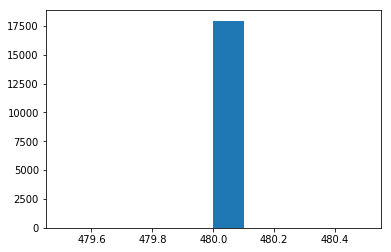

In [145]:
plt.hist(col_sz)

In [146]:
len(data.trn_ds), len(data.test_ds)

(17940, 79726)

In [147]:
len(data.classes), data.classes[:5]

(10, ['c0', 'c1', 'c2', 'c3', 'c4'])

In [149]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}driver_imgs_list-NT_reordered.csv', test_name='test',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs)
    
    return data if sz > 300 else data.resize(340, 'tmp')

In [150]:
data = get_data(sz, bs)

In [151]:
learn = ConvLearner.pretrained(arch, data, pretrained=True)

 85%|████████▍ | 263/310 [01:13<00:13,  3.57it/s, loss=5.73]

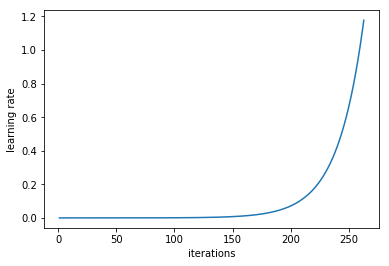

In [153]:
lrf = learn.lr_find()
learn.sched.plot_lr()

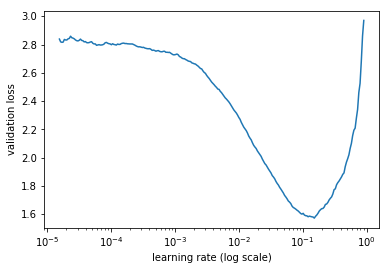

In [154]:
learn.sched.plot()

In [155]:
learn.fit(0.05, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.677189   0.279443   0.908787  
    1      0.491045   0.155028   0.954728                    
    2      0.404337   0.121996   0.963649                    
    3      0.351279   0.106386   0.96967                     
    4      0.318298   0.08904    0.975245                    


[array([0.08904]), 0.9752453196059371]

## Augment

In [156]:
from sklearn import metrics

In [ ]:
#data = get_data(sz, bs)  # don't think this is necessary here

In [ ]:
# learn = ConvLearner.pretrained(arch, data, pretrained=True, ps=0.5) 
    #don't think it's necessary to use ps=0.5, the dropout parameter bc the model is not overfitting.

In [157]:
ConvLearner.pretrained??

In [158]:
learn.precompute = False

In [159]:
learn.fit(0.05, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.239619   0.074676   0.979706  
    1      0.231722   0.067247   0.979706                    
    2      0.239064   0.061286   0.982828                    
    3      0.21484    0.061385   0.980375                    
    4      0.203676   0.057901   0.983051                    


[array([0.0579]), 0.9830508510998378]

In [162]:
learn.save('224_pre')

In [163]:
learn.load('224_pre')

In [164]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

## Increase size

In [ ]:
'''
Since it's not overfitting, don't think it's necessary to switch to bigger images.
Need to address underfitting instead
'''
# learn.set_data(get_data(299, bs))
# learn.freeze()

In [ ]:
# learn.summary()

In [ ]:
# learn.fit(0.05, 3, cycle_len=1)

In [165]:
learn.fit(0.05, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.229123   0.056486   0.984612  
    1      0.210357   0.053698   0.985058                    
    2      0.172419   0.052221   0.984389                    
    3      0.211486   0.052101   0.984835                    
    4      0.200078   0.05089    0.986173                    
    5      0.169863   0.048061   0.985727                    
    6      0.167264   0.045336   0.987957                    


[array([0.04534]), 0.9879571835075927]

In [166]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9924174843889384, 0.044106173450300934)

In [167]:
len(data.val_ds.y), data.val_ds.y[:5]

(4484, array([0, 0, 0, 0, 0]))

In [168]:
# reduce the lr to something smaller to address underfitting
learn.fit(0.025, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.163521   0.04303    0.987511  
    1      0.161428   0.040918   0.987511                    
    2      0.141373   0.039097   0.988403                    
    3      0.158759   0.038212   0.989518                    
    4      0.149387   0.037287   0.98818                     
    5      0.140593   0.037604   0.988849                    
    6      0.142224   0.036282   0.988849                    


[array([0.03628]), 0.9888492423333194]

In [ ]:
# learn.fit(0.05, 1, cycle_len=2)

In [169]:
learn.save('224_pre')

In [170]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.991971454058876, 0.037377331623541295)

## Create submission

In [171]:
data.classes

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [172]:
data.test_ds.fnames

['test/img_37990.jpg',
 'test/img_79092.jpg',
 'test/img_55859.jpg',
 'test/img_92870.jpg',
 'test/img_20844.jpg',
 'test/img_46378.jpg',
 'test/img_43222.jpg',
 'test/img_41999.jpg',
 'test/img_44458.jpg',
 'test/img_3738.jpg',
 'test/img_95897.jpg',
 'test/img_93761.jpg',
 'test/img_92294.jpg',
 'test/img_70963.jpg',
 'test/img_59155.jpg',
 'test/img_90544.jpg',
 'test/img_67101.jpg',
 'test/img_89867.jpg',
 'test/img_76790.jpg',
 'test/img_77318.jpg',
 'test/img_56520.jpg',
 'test/img_51008.jpg',
 'test/img_1372.jpg',
 'test/img_55364.jpg',
 'test/img_26345.jpg',
 'test/img_80702.jpg',
 'test/img_45651.jpg',
 'test/img_64322.jpg',
 'test/img_65746.jpg',
 'test/img_17468.jpg',
 'test/img_85117.jpg',
 'test/img_23098.jpg',
 'test/img_98108.jpg',
 'test/img_79914.jpg',
 'test/img_20006.jpg',
 'test/img_85875.jpg',
 'test/img_90406.jpg',
 'test/img_68451.jpg',
 'test/img_96662.jpg',
 'test/img_48122.jpg',
 'test/img_61470.jpg',
 'test/img_69285.jpg',
 'test/img_77452.jpg',
 'test/img_90

In [173]:
log_preds, y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds), 0)

In [174]:
probs.shape

(79726, 10)

In [175]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [176]:
df.insert(0, 'img', [o[5:] for o in data.test_ds.fnames])

In [177]:
df.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_37990.jpg,0.688812,0.002059,0.000459,0.004452,0.033929,0.053780,0.048652,0.010362,0.150414,0.007081
1,img_79092.jpg,0.008389,0.001737,0.000033,0.000013,0.000393,0.973367,0.000317,0.010714,0.001611,0.003425
2,img_55859.jpg,0.058119,0.162753,0.007905,0.006535,0.124123,0.160721,0.004500,0.236849,0.209813,0.028681
3,img_92870.jpg,0.307974,0.001206,0.082883,0.036477,0.090203,0.083122,0.006758,0.012606,0.155279,0.223491
4,img_20844.jpg,0.029088,0.000581,0.001743,0.000459,0.007061,0.000505,0.890846,0.004953,0.052287,0.012478


In [184]:
SUBM = f'{PATH}sample_submission.csv'
df.to_csv(f'{SUBM}', index=False)
# df.to_csv(f'{SUBM}', compression='gzip', index=False)

In [185]:
FileLink(f'{SUBM}')

/home/paperspace/fastai/courses/dl1/data/distractedDriver/sample_submission.csv

In [187]:
# The above solution resulted in a score of 0.92936

# round the the values in each slot to two decimal places
df.c0 = df.c0.round(2)

In [189]:
df = df.round(2)

In [190]:
df

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_37990.jpg,0.69,0.00,0.00,0.00,0.03,0.05,0.05,0.01,0.15,0.01
1,img_79092.jpg,0.01,0.00,0.00,0.00,0.00,0.97,0.00,0.01,0.00,0.00
2,img_55859.jpg,0.06,0.16,0.01,0.01,0.12,0.16,0.00,0.24,0.21,0.03
3,img_92870.jpg,0.31,0.00,0.08,0.04,0.09,0.08,0.01,0.01,0.16,0.22
4,img_20844.jpg,0.03,0.00,0.00,0.00,0.01,0.00,0.89,0.00,0.05,0.01
5,img_46378.jpg,0.67,0.17,0.01,0.00,0.09,0.00,0.00,0.00,0.05,0.01
6,img_43222.jpg,0.03,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.00,0.92
7,img_41999.jpg,0.12,0.00,0.01,0.76,0.02,0.00,0.00,0.00,0.05,0.03
8,img_44458.jpg,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.48,0.01,0.01
9,img_3738.jpg,0.00,0.00,0.80,0.00,0.01,0.00,0.08,0.00,0.10,0.00


In [191]:
SUBM = f'{PATH}sample_submission.csv'
df.to_csv(f'{SUBM}', index=False)
# df.to_csv(f'{SUBM}', compression='gzip', index=False)

In [192]:
FileLink(f'{SUBM}')

/home/paperspace/fastai/courses/dl1/data/distractedDriver/sample_submission.csv

In [193]:
# data frame with only one decimal palce
df2 = df
df2

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_37990.jpg,0.69,0.00,0.00,0.00,0.03,0.05,0.05,0.01,0.15,0.01
1,img_79092.jpg,0.01,0.00,0.00,0.00,0.00,0.97,0.00,0.01,0.00,0.00
2,img_55859.jpg,0.06,0.16,0.01,0.01,0.12,0.16,0.00,0.24,0.21,0.03
3,img_92870.jpg,0.31,0.00,0.08,0.04,0.09,0.08,0.01,0.01,0.16,0.22
4,img_20844.jpg,0.03,0.00,0.00,0.00,0.01,0.00,0.89,0.00,0.05,0.01
5,img_46378.jpg,0.67,0.17,0.01,0.00,0.09,0.00,0.00,0.00,0.05,0.01
6,img_43222.jpg,0.03,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.00,0.92
7,img_41999.jpg,0.12,0.00,0.01,0.76,0.02,0.00,0.00,0.00,0.05,0.03
8,img_44458.jpg,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.48,0.01,0.01
9,img_3738.jpg,0.00,0.00,0.80,0.00,0.01,0.00,0.08,0.00,0.10,0.00


In [194]:
df2 = df2.round(1)

In [197]:
SUBM = f'{PATH}sample_submission.csv'
df2.to_csv(f'{SUBM}', index=False)
# df.to_csv(f'{SUBM}', compression='gzip', index=False)

In [198]:
FileLink(f'{SUBM}')

/home/paperspace/fastai/courses/dl1/data/distractedDriver/sample_submission.csv